In [24]:
import numpy as np
from PIL import Image

In [41]:
im = Image.open("/home/rui/Downloads/mars.png").convert('L')

In [42]:
print(im.format, im.size, im.mode)

None (2880, 1800) L


In [44]:
X = np.array(im)

(1800, 2880)

In [45]:
X

array([[119, 135, 157, ..., 198, 216, 226],
       [110, 122, 157, ..., 217, 210, 212],
       [ 99, 107, 132, ..., 211, 194, 192],
       ..., 
       [ 87,  88,  82, ...,  70,  67,  69],
       [ 83,  84,  83, ...,  68,  66,  66],
       [ 81,  78,  83, ...,  64,  60,  67]], dtype=uint8)

In [4]:
box = (100, 100, 140, 140)
region = im.crop(box)

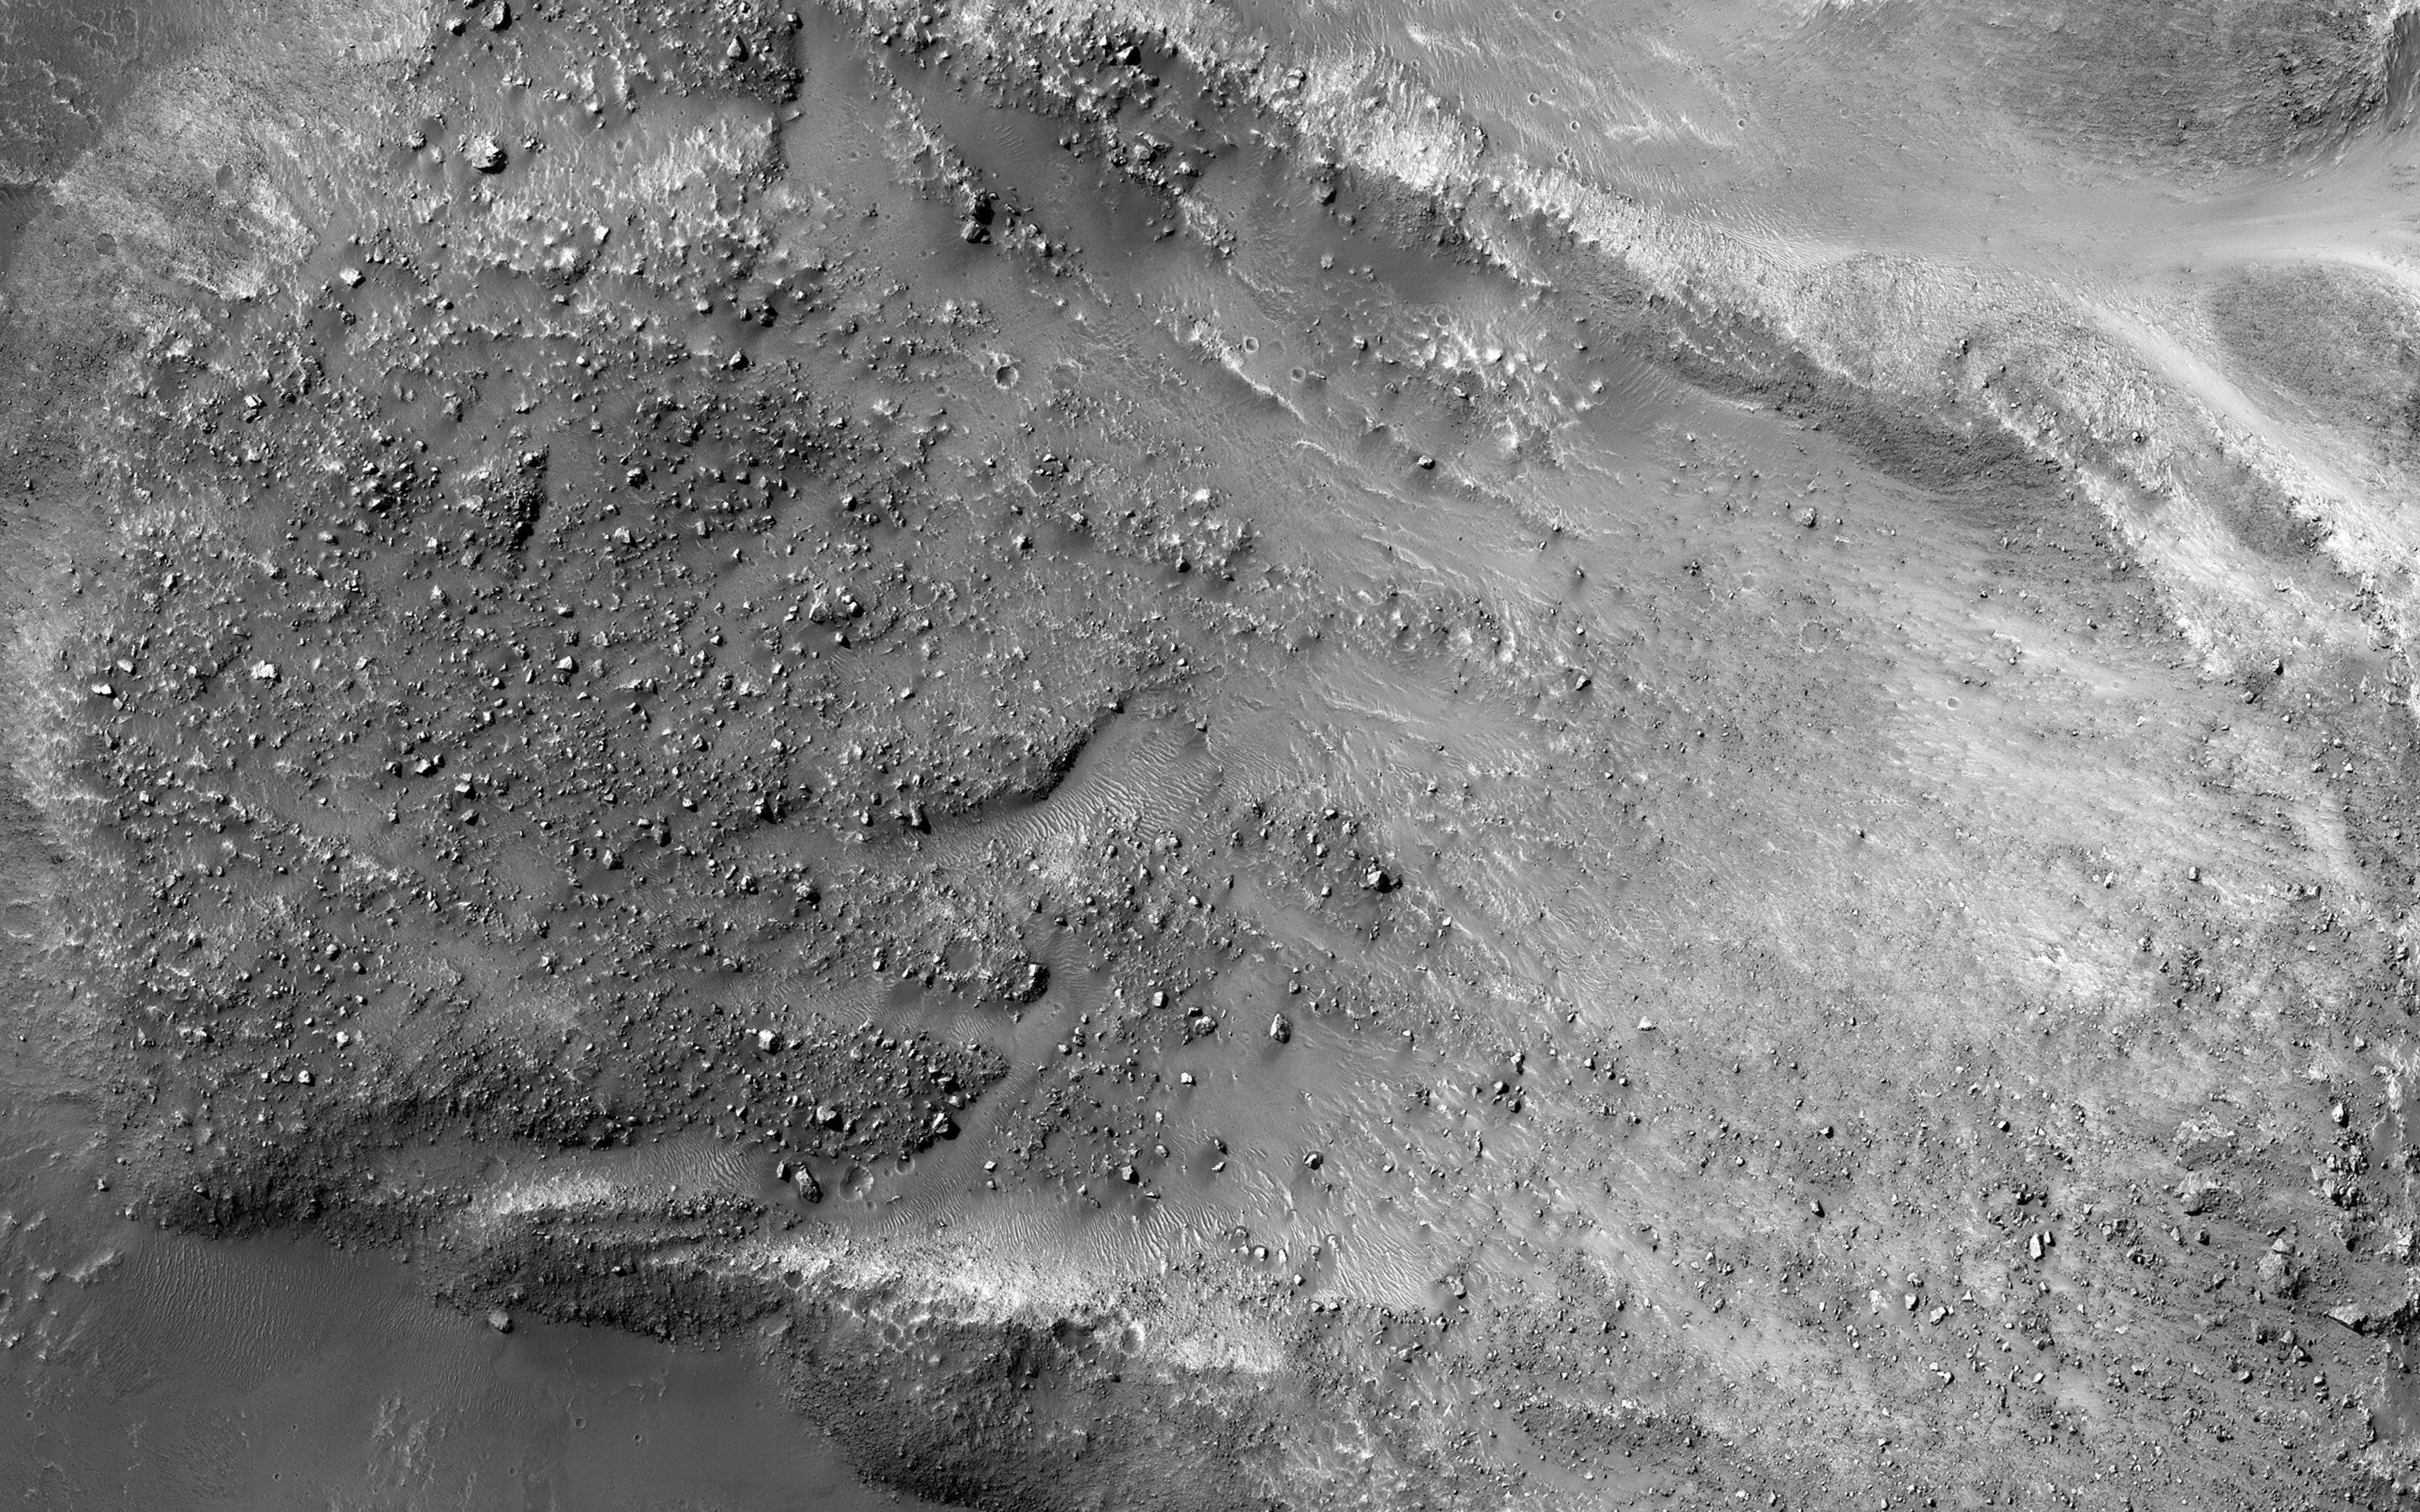

In [46]:
im

In [49]:
box = (100, 100, 164, 164)
region = im.crop(box)

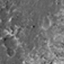

In [50]:
region

In [51]:
def action1(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region,dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0]+i*stride, start_point[1], start_point[0]+(i+2)*stride, start_point[1]+height)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [55]:
data1, data_out1, end_point = action1((100,100),32,60)

In [56]:
def action2(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region, dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0], start_point[1]+i*stride, start_point[0]+width, start_point[1]+(i+2)*stride)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [57]:
data2, data_out2, end_point = action2(end_point,32,40)

In [58]:
def action3(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region,dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0]-i*stride, start_point[1], start_point[0]-i*stride+width, start_point[1]+height)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [59]:
data3, data_out3, end_point = action3(end_point,32,60)

In [60]:
end_point

(100, 1380)

In [64]:
def action4(start_point, stride = 20, steps = 10):
    width = 2*stride
    height = 2*stride
    data = np.zeros((steps, width, height))
    data_out = np.zeros((steps, width, height))
    box = (start_point[0], start_point[1], start_point[0]+width, start_point[1]+height)
    region = im.crop(box)
    data[0] = np.asarray(region, dtype = np.float32)
    for i in np.arange(1,steps+1,1):
        box = (start_point[0], start_point[1]-i*stride, start_point[0]+width, start_point[1]-i*stride+height)
        region = im.crop(box)
        temp = np.asarray(region,dtype = np.float32)
        data_out[i-1] = temp
        if i != steps:
            data[i] = temp
    end_point = (box[0], box[1])
    return data, data_out, end_point

In [68]:
data4, data_out4, end_point= action4((1060,1380),32,40)

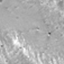

In [61]:
Image.fromarray(np.uint8(data1[-1]))

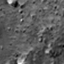

In [63]:
Image.fromarray(np.uint8(data3[-1]))

In [69]:
end_point

(1060, 100)

In [70]:
np.savez('output/mars.npz', data1,data_out1,data2,data_out2,data3,data_out3,data4,data_out4)